## Predicting Customer Churn for SyriaTel

## Business Understanding

The goal of this project is to develop a predictive model to identify customers who are likely to stop doing business with SyriaTel, a telecommunications company. By accurately predicting customer churn, SyriaTel can take proactive measures to retain these customers, thereby reducing revenue loss and increasing customer lifetime value. The main stakeholders for this project are the management and marketing teams of SyriaTel, who are directly involved in customer retention strategies.

Customer churn is a critical issue in the telecom industry, where acquiring a new customer is often more expensive than retaining an existing one. By predicting which customers are likely to churn, SyriaTel can implement targeted retention campaigns, offer personalized incentives, and improve customer satisfaction, ultimately reducing churn rates and improving profitability.

## Problem Statement

SyriaTel has been experiencing a high churn rate leading to losses for the company.This project aims to create a predictive model that accurately identifies customers at risk of churning for SyriaTel, a telecommunications company.

By proactively identifying customers who may discontinue their services, the objective is to decrease customer attrition and retain a higher number of customers. Ultimately, the project seeks to support SyriaTel in reducing financial losses caused by customer churn, improving overall customer retention rates, and optimizing business strategies to enhance profitability.

## Objectives

The primary business objectives of this project for SyriaTel are to reduce customer churn, improve customer retention rates, and enhance overall customer satisfaction.

We will focus on the following questions to achieve our objectives;



## Data Understanding

Data Reference: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

The dataset contains information on 3,333 customers from SyriaTel, with 21 features including demographic data, service usage, and customer interaction metrics. The target variable is churn, indicating whether a customer has left the company.

### Summary Features in the Dataset

- state: the state the customer lives in

- account length: the number of days the customer has had an account

- area code: the area code of the customer

- phone number: the phone number of the customer

- international plan: true if the customer has the international plan, otherwise false

- voice mail plan: true if the customer has the voice mail plan, otherwise false

- number vmail messages: the number of voicemails the customer has sent

- total night calls: total number of calls the customer has done during the night

- total night calls: total number of calls the customer has done during the night

- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

- total intl minutes: total number of minutes the user has been in international calls

- total intl calls: total number of international calls the customer has done

- total intl charge: total amount of money the customer was charged by the Telecom company for international calls

- customer service calls: number of calls the customer has made to customer service

- churn: true if the customer terminated their contract, otherwise false

In [106]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


## Loading Data

In [107]:
# Imorting the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [108]:
# Checking for the shape of the dataset
df.shape

(3333, 21)

In [109]:
# Detailed information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [110]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning

In [111]:
# Checking for missing data

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing data.

In [112]:
# checking for duplicates in the 'phone number' column

duplicates = df['phone number'].duplicated().sum()
duplicates

0

There no duplicates in the phone number column which should contain unique values.

## Exploratory Data Analysis

In [113]:
# Convert the "churn" column to integer type
df["churn"] = df["churn"].astype(int)

In [114]:
# seperating categorical from numerical data
categorical_df = df.select_dtypes("object")
categorical_df = categorical_df.drop("phone number", axis=1)
categorical_df.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


The "phone number" column was dropped because it is useful as a unique identifier but not as a feature.

In [115]:
# numerical data
numeric_df =  df.select_dtypes("number")
numeric_df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Univariate Analysis

0    2850
1     483
Name: churn, dtype: int64


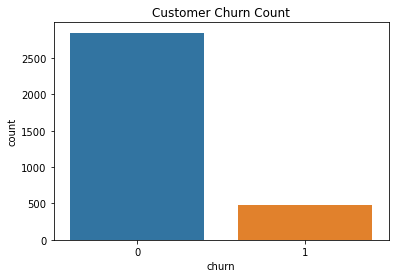

In [116]:
# Count of churn (target variable)

print(df['churn'].value_counts())

# Visualize the churn distribution using a count plot
sns.countplot(data=df, x='churn')
plt.title('Customer Churn Count')
plt.show()

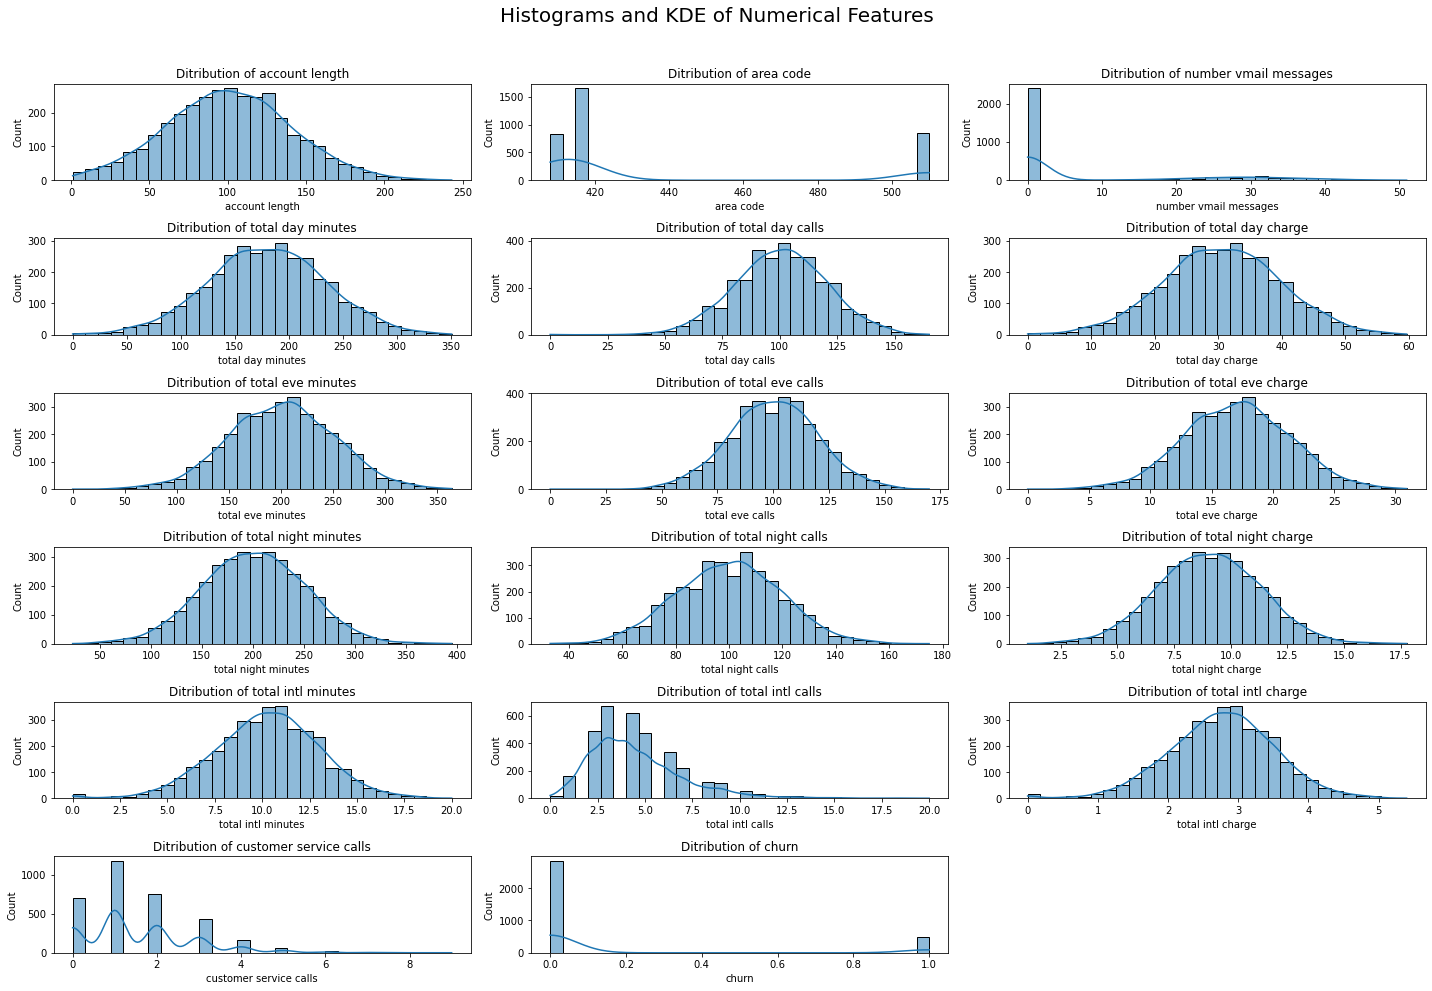

In [117]:
# Visualizing the distributions of numerical features using histograms with KDE
plt.figure(figsize=(20, 14))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title(f'Ditribution of {column}')

plt.suptitle('Histograms and KDE of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

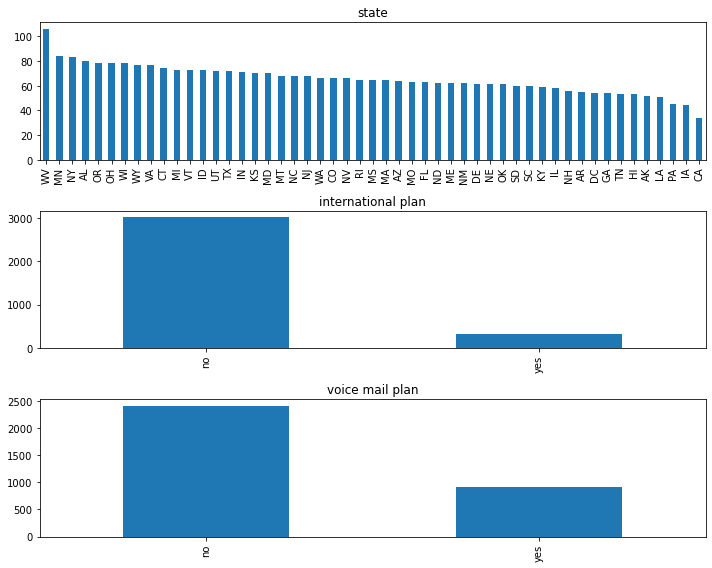

In [118]:
# Visualizing categorical features

# Create the figure and axis objects
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize=(10, 8))

# Flatten the axis array so that it can be iterated over easily
ax = ax.flatten()

# Loop over the columns and plot a density graph for each one

columns = categorical_df.columns.tolist()

for i, col in enumerate (columns):
    categorical_df[col].value_counts().plot(kind="bar", ax=ax[i])
    ax[i].set_title(col)

# Adjust the spacing between the subplots
fig.tight_layout()

## Bivariate Analysis: Relationship Between Categorical Variables, Numerical Variables, and Churn

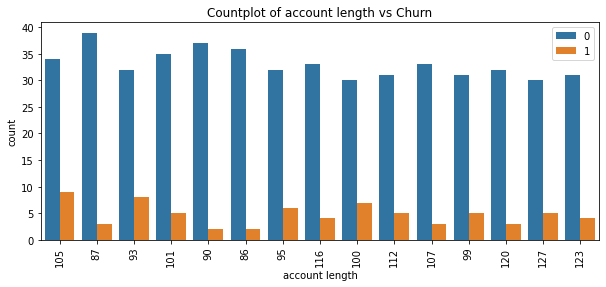

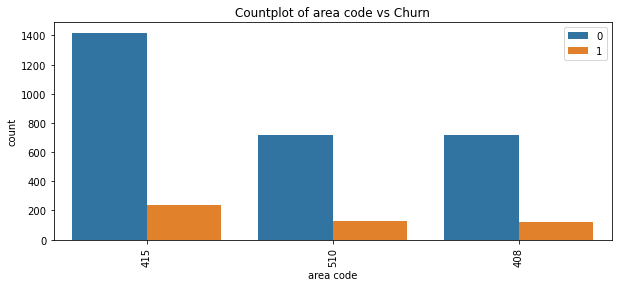

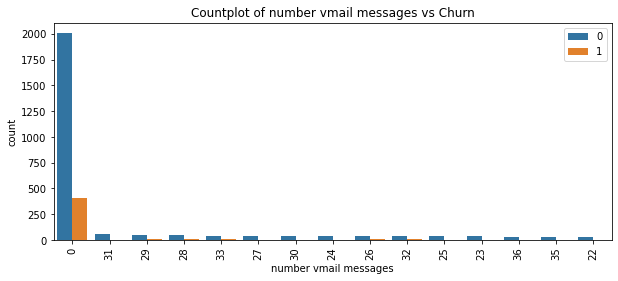

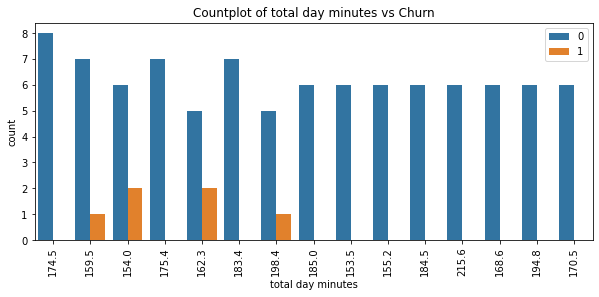

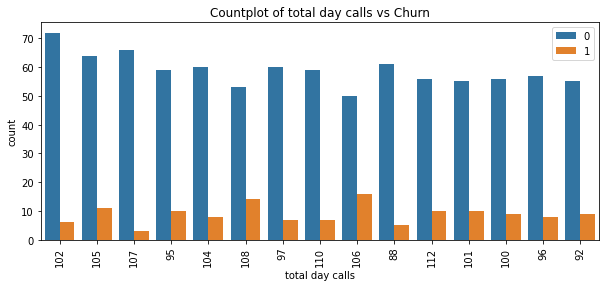

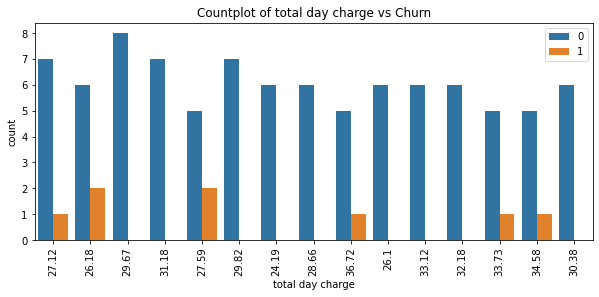

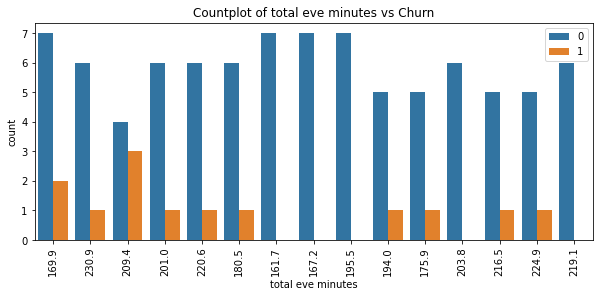

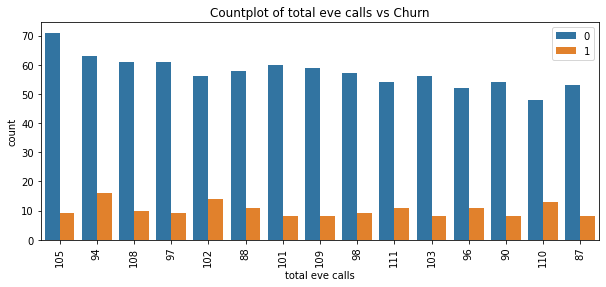

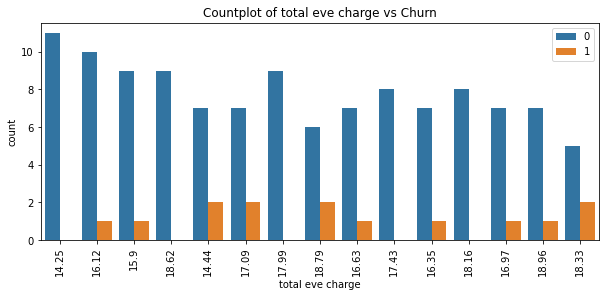

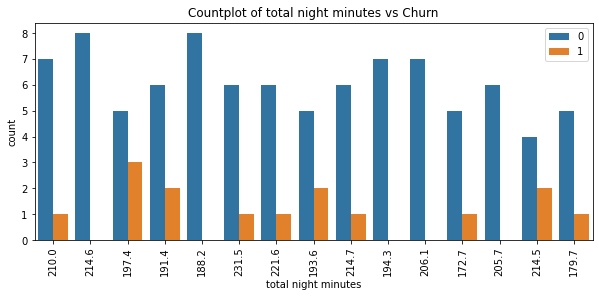

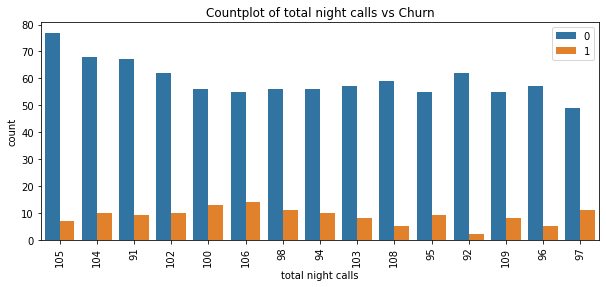

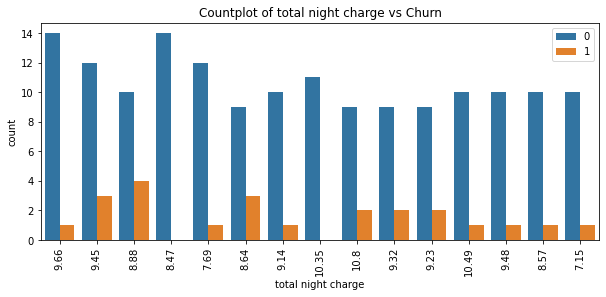

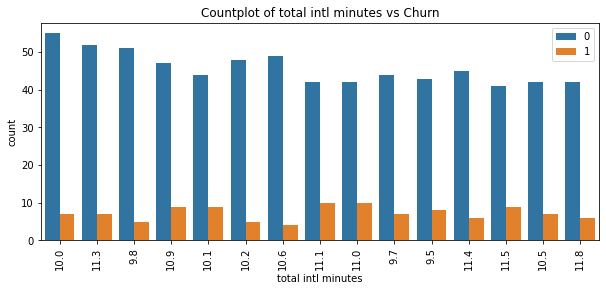

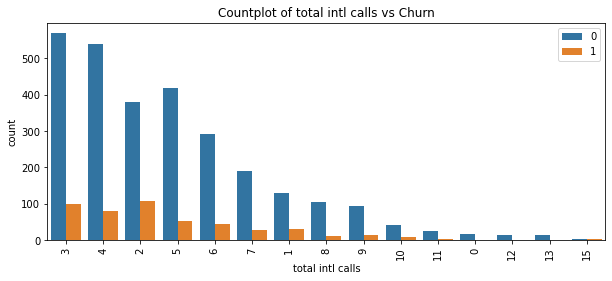

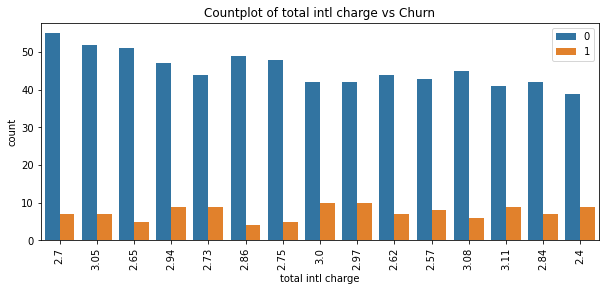

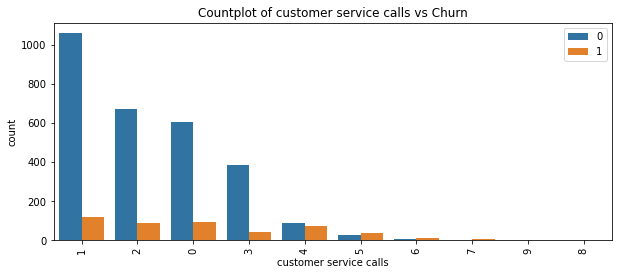

In [119]:
# Dropping the churn column from numeric_df
numeric_df = numeric_df.drop("churn", axis=1)

# Comparing numeric data to churn using countplots
for i in numeric_df:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=i, hue="churn", data=df, order=df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Countplot of {i} vs Churn')
    plt.show()


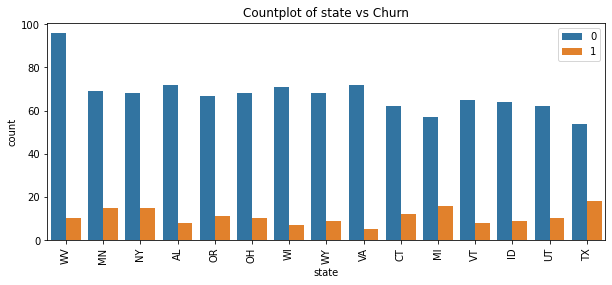

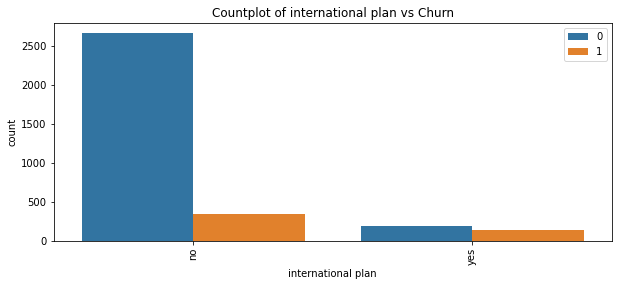

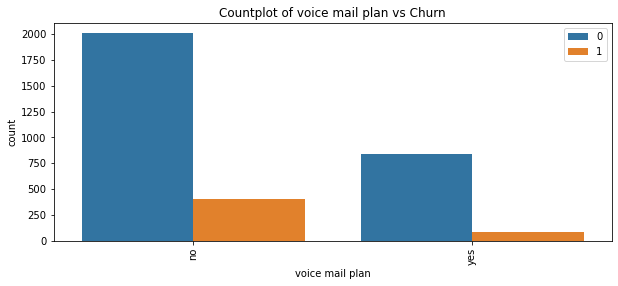

In [120]:
# Comparing categorical data to "churn"
for i in columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=i, hue="churn", data=df, order=df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Countplot of {i} vs Churn')
    plt.show()


## Multivariate Analysis

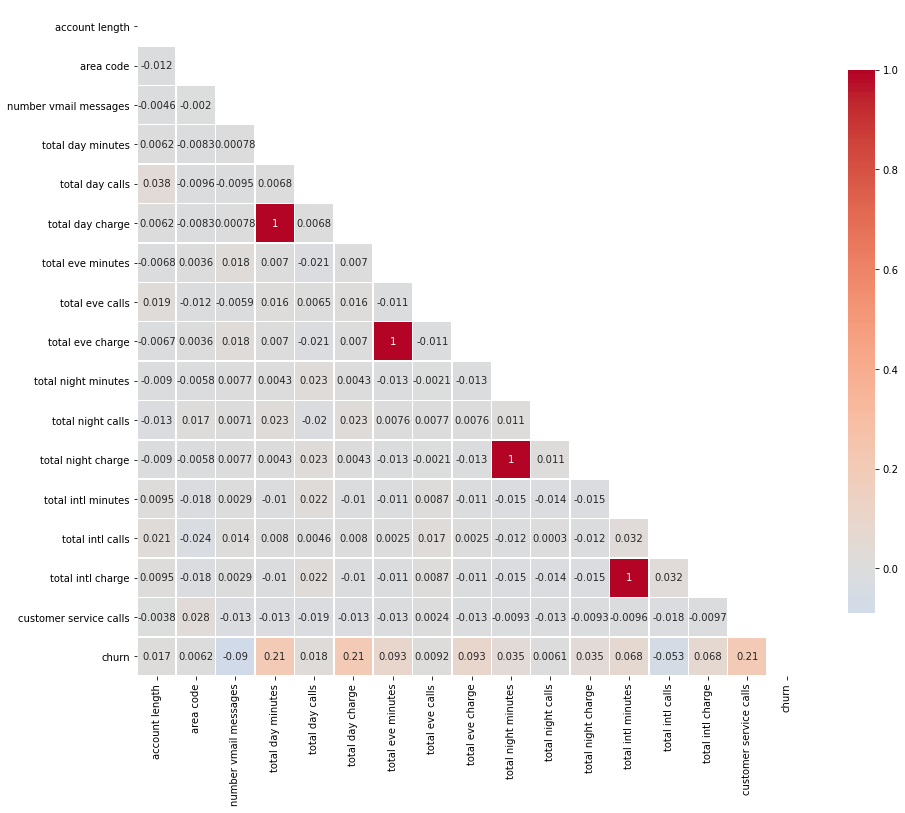

In [121]:
# using heatmap to show collinearity
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

Total day minutes & total day charge - correlation 1 hence we can drop one of these

Total eve minutes & total eve charge - correlation 1 hence we can drop one of these

Total night minutes & total night charge - correlation 1 hence we can drop one of these

Total intl minutes & total intl charge - correlation 1 hence we can drop one of these

The following columns were dropped because of high Multicolinearity Between each other.

total day minutes
total eve minutes
total night minutes
total intl minutes

In [122]:
df_subset = df.drop(columns= ['total day minutes', 'total eve minutes', 'total night calls','total intl minutes','phone number' ], axis = 1)
df_subset

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,244.7,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,254.4,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,162.6,7.32,5,3.29,0,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,196.9,8.86,7,1.78,2,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,186.9,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,279.1,12.56,6,2.67,2,0
3329,WV,68,415,no,no,0,57,39.29,55,13.04,191.3,8.61,4,2.59,3,0
3330,RI,28,510,no,no,0,109,30.74,58,24.55,191.9,8.64,6,3.81,2,0
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,139.2,6.26,10,1.35,2,0


## Feature Engineering

Feature engineering was performed as follows:
- Combined Features:    
total_combined_usage: Combines the total day and evening calls.     
total_combined_charge: Combines the charges from day, evening, and international calls.

- Simplified Ratios and Flags:  
cust_serv_calls_ratio: A ratio that gives insight into how frequently a customer contacts customer service relative to their account length.    
high_cust_service_calls: A binary flag indicating customers with high customer service interaction.

- Dropping Redundant Features:  
After creating these combined and simplified features, the original columns are dropped to reduce the feature set and focus on the most informative ones.

In [123]:

# 1. Combined Usage Features: Create a single feature that combines the total usage (day + evening)
df_subset['total_combined_usage'] = df_subset['total day calls'] + df_subset['total eve calls']

# 2. Combined Charge Features: Create a single feature that combines all the charges (day + evening + international)
df_subset['total_combined_charge'] = df_subset['total day charge'] + df_subset['total eve charge'] + df_subset['total intl charge']

# 3. Ratio of customer service calls to account length
df_subset['cust_serv_calls_ratio'] = df_subset['customer service calls'] / df_subset['account length']

# 4. Binary Feature for high customer service interaction (over a threshold)
df_subset['high_cust_service_calls'] = df_subset['customer service calls'].apply(lambda x: 1 if x > 3 else 0)


In [124]:
# Dropping Unnecessary Features
# List of features to drop (those used in creating new features)
features_to_drop = [
    'total day calls', 'total eve calls',  # Combine into 'total_combined_usage'
    'total day charge', 'total eve charge', 'total intl charge',  # Combine into 'total_combined_charge'
    'customer service calls', 'account length'  # Used for ratio and binary features
]

# Drop the unnecessary features
df_subset = df_subset.drop(columns=features_to_drop)

# Display the remaining features in the DataFrame
df_subset.head()


,state,area code,international plan,voice mail plan,number vmail messages,total night minutes,total night charge,total intl calls,churn,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls
0,KS,415,no,yes,25,244.7,11.01,3,0,209,64.55,0.007812,0
1,OH,415,no,yes,26,254.4,11.45,3,0,226,47.79,0.009346,0
2,NJ,415,no,no,0,162.6,7.32,5,0,224,54.97,0.000000,0
3,OH,408,yes,no,0,196.9,8.86,7,0,159,57.94,0.023810,0
4,OK,415,yes,no,0,186.9,8.41,3,0,235,43.68,0.040000,0


## Model Preprocessing

In [125]:
# one hot encoding categorical values
df_encoded = pd.get_dummies(df_subset)
df_encoded

,area code,number vmail messages,total night minutes,total night charge,total intl calls,churn,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,415,25,244.7,11.01,3,0,209,64.55,0.007812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,415,26,254.4,11.45,3,0,226,47.79,0.009346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,415,0,162.6,7.32,5,0,224,54.97,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,408,0,196.9,8.86,7,0,159,57.94,0.023810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,415,0,186.9,8.41,3,0,235,43.68,0.040000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,279.1,12.56,6,0,203,47.54,0.010417,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3329,415,0,191.3,8.61,4,0,112,54.92,0.044118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3330,510,0,191.9,8.64,6,0,167,59.10,0.071429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3331,510,0,139.2,6.26,10,0,189,51.27,0.010870,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [126]:
# Spliting data into predictor and target Variables
y = df_encoded.churn  
X = df_encoded.drop(['churn'], axis=1) 

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Scaling the data

scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


X_test_scaled.head()

,area code,number vmail messages,total night minutes,total night charge,total intl calls,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1.735840,-0.584936,-0.219520,-0.220859,-0.593980,-0.053505,0.758956,-0.139196,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,6.534900,0.326624,-0.326624,0.611162,-0.611162
1,-0.517168,-0.584936,-0.239243,-0.238391,0.634849,1.438671,-0.967120,-0.221276,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,7.719515,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
2,-0.517168,-0.584936,-0.659356,-0.659155,-1.413199,-2.504937,-3.425381,0.157299,3.359422,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,7.090080,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
3,-0.683179,-0.584936,-0.874343,-0.873920,-1.003589,-1.083817,0.580566,-0.158180,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,7.464811,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
4,-0.683179,-0.584936,0.535893,0.537392,1.044458,-0.906177,-0.399602,-0.124661,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,6.534900,0.326624,-0.326624,0.611162,-0.611162


In [129]:
# Using SMOTE to deal with class imbalance

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())

0    2284
1     382
Name: churn, dtype: int64


1    2284
0    2284
Name: churn, dtype: int64


## Modeling

In [130]:
# Creating a function to calculate evaluation metrics

def evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test):
    # Calculate metrics
    metrics = {
        'Metric': ['Precision', 'Recall', 'Accuracy', 'F1-Score'],
        'Training': [
            precision_score(y_train_resampled, y_hat_train),
            recall_score(y_train_resampled, y_hat_train),
            accuracy_score(y_train_resampled, y_hat_train),
            f1_score(y_train_resampled, y_hat_train)
        ],
        'Testing': [
            precision_score(y_test, y_hat_test),
            recall_score(y_test, y_hat_test),
            accuracy_score(y_test, y_hat_test),
            f1_score(y_test, y_hat_test)
        ]
    }
    
    # Create a DataFrame to store the results
    metrics_df = pd.DataFrame(metrics)
    
    # Display the DataFrame
    display(metrics_df)
    return metrics_df

In [131]:
# Creating a function to plot a confusion matrix
def plot_confusion_matrix(y_test, y_hat_test, figsize=(10, 4), cmap='coolwarm'):
    """
    Plots a heatmap of the confusion matrix.
    
    Parameters:
    y_test (array-like): True labels of the test set.
    y_hat_test (array-like): Predicted labels of the test set.
    figsize (tuple): Size of the figure for the plot.
    cmap (str): Colormap to use for the heatmap.
    
    Returns:
    None
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_hat_test)
    
    # Plotting the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [132]:
# Creating a function to plot ROC and AUC
def plot_roc_curve(lr, X_test, y_test, figsize=(20, 8)):
    """
    Plots the ROC curve and prints the AUC score.
    
    Parameters:
    lr (model): The trained logistic regression model.
    X_test (array-like): The test dataset features.
    y_test (array-like): The true labels of the test dataset.
    figsize (tuple): Size of the figure for the plot.
    
    Returns:
    None
    """
    # Calculate the predicted probabilities
    y_pred_prob = lr.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the area under the ROC curve
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot the ROC curve
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    # Print the AUC score
    print('The AUC score is:', auc)


## Model 1: Logistic Regression

In [133]:
# create an instance
lr = LogisticRegression()

# fit the model
lr.fit(X_train_resampled, y_train_resampled)

# predict the model
y_hat_train = lr.predict(X_train_resampled)
y_hat_test=lr.predict(X_test)

metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

c:\Users\Mzii\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Metric,Training,Testing
0,Precision,0.882567,0.556391
1,Recall,0.848949,0.732673
2,Accuracy,0.867995,0.871064
3,F1-Score,0.865432,0.632479


- The model shows signs of overfitting, as evidenced by the significant drop in precision and F1-score when moving from training to testing data.
- The relatively consistent recall and accuracy suggest that the model is able to correctly identify a fair number of positive cases and has a similar overall performance between training and testing sets.

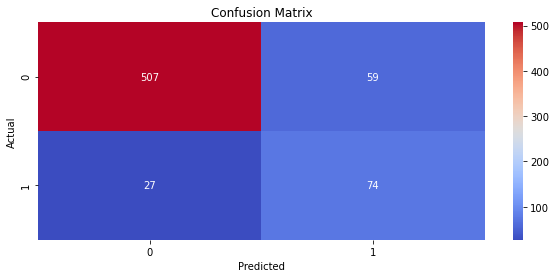

In [134]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation:
- True Positives (TP): The model correctly predicted the positive class (74).     
- True Negatives (TN): The model correctly predicted the negative class (507).    
- False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (59).    
- False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (27).    

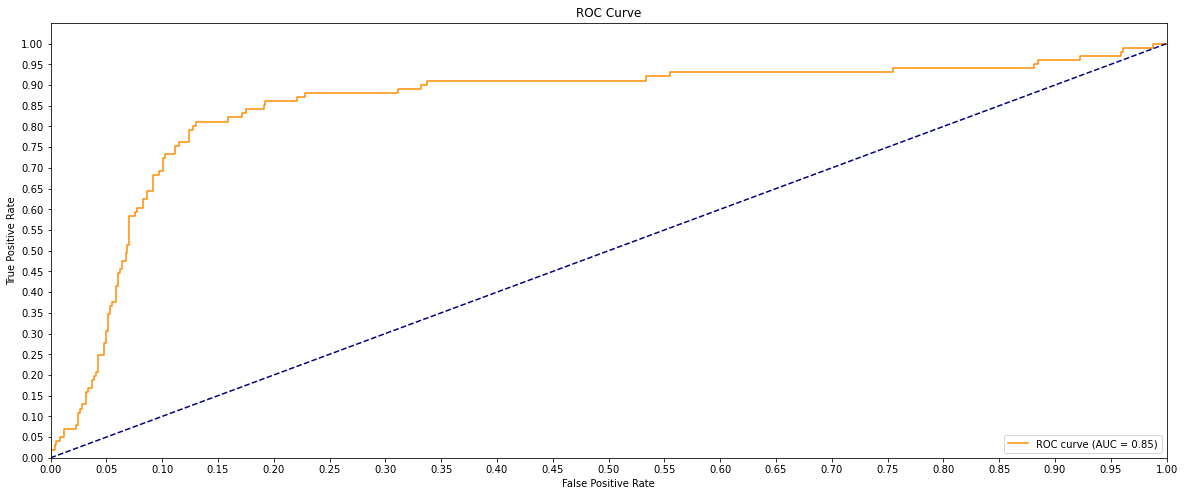

The AUC score is: 0.853864185005073


In [135]:
plot_roc_curve(lr, X_test, y_test)

 - The ROC curve is above the diagonal line, indicating that the model performs better than random guessing. 
 - The AUC score of 0.85 indicates that the model has a good ability to distinguish between the positive and negative classes.

## Model 2: Decision Trees

In [136]:
Dt = DecisionTreeClassifier(criterion="entropy", random_state = 42)
# fit the model
Dt.fit(X_train_resampled, y_train_resampled)

# predict
y_hat_train = Dt.predict(X_train_resampled)
y_hat_test= Dt.predict(X_test)

In [137]:
# Testing the perfomance of the model using different metrics
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,1.0,0.626984
1,Recall,1.0,0.782178
2,Accuracy,1.0,0.896552
3,F1-Score,1.0,0.696035


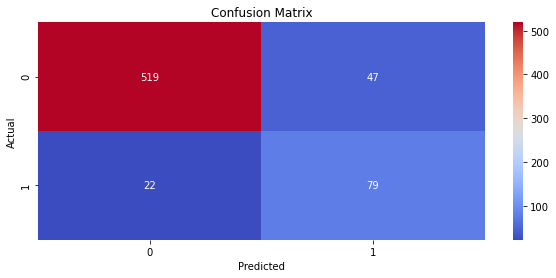

In [138]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation: 
- True Positives (TP): 79 cases were correctly predicted as positive.  
- True Negatives (TN): 519 cases were correctly predicted as negative.  
- False Positives (FP): 47 cases were incorrectly predicted as positive when they were actually negative.  
- False Negatives (FN): 22 cases were incorrectly predicted as negative when they were actually positive.

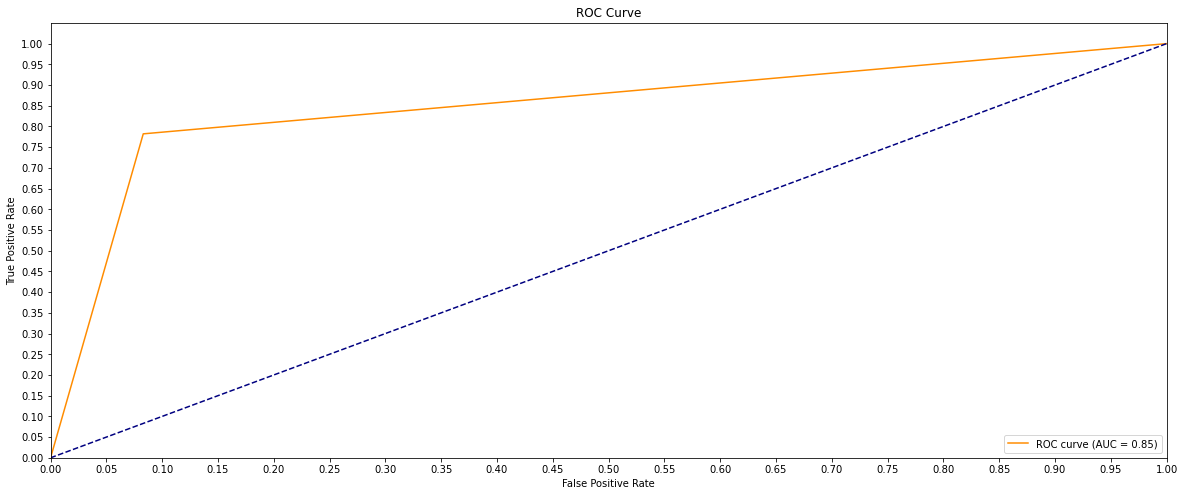

The AUC score is: 0.8495696742819158


In [139]:
plot_roc_curve(Dt, X_test, y_test)

 - The ROC curve is above the diagonal line, indicating that the model performs better than random guessing. 
 - The AUC score of 0.85 indicates that the model has a good ability to distinguish between the positive and negative classes.

## Model Tuning

The models were improved using hyperparameter tuning. Hyperparameter tuning involves finding the best combination of parameters for the model, which can enhance its performance on the validation set and subsequently improve generalization to unseen data.